In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# AIDS Clinical Trials Group Study 175

Прогнозирование беременности с высоким риском
1. Age	- возвраст
2. SystolicBP - верхнее значение артериального давления в мм рт. ст.
3. DiastolicBP -  нижнее значение артериального давления в мм рт. ст.
4. BS - уровень глюкозы в крови выражается в молярной концентрации.
5. BodyTemp - температура тела
6. HeartRate - частота сердечных сокращений
7. RiskLevel - уровень риска (меленький, средний, высокий)


In [2]:
#Загружаем данные в датафрейм
cirrhos = pd.read_csv('Maternal Health Risk Data Set.csv')

#Выводим статистическую информацию
print(cirrhos.describe())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [3]:
cirrhos.shape
cirrhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
cirrhos['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [5]:
# cirrhos.drop(columns=['ID'], inplace=True)
# cirrhos.dropna(inplace=True)
# print(cirrhos)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для замены категориальных данных
le = LabelEncoder()
cirrhos["RiskLevel"] = le.fit_transform(cirrhos["RiskLevel"])
print(cirrhos)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          0
1      35         140           90  13.0      98.0         70          0
2      29          90           70   8.0     100.0         80          0
3      30         140           85   7.0      98.0         70          0
4      35         120           60   6.1      98.0         76          1
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          0
1010   55         120           90  18.0      98.0         60          0
1011   35          85           60  19.0      98.0         86          0
1012   43         120           90  18.0      98.0         70          0
1013   32         120           65   6.0     101.0         76          2

[1014 rows x 7 columns]


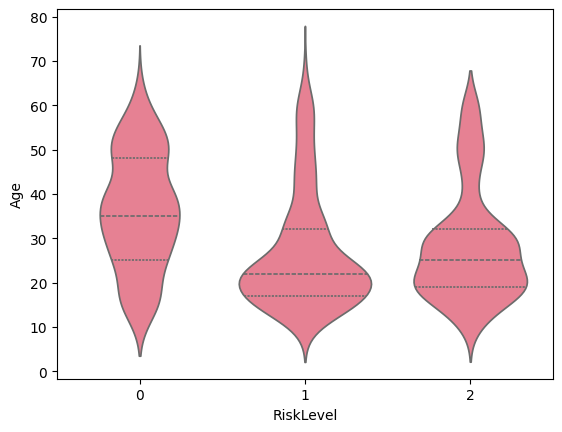

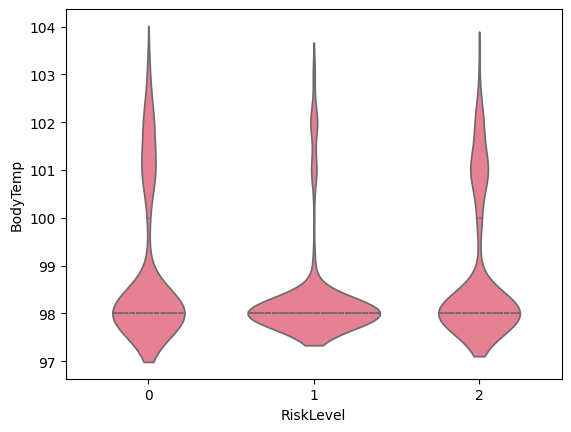

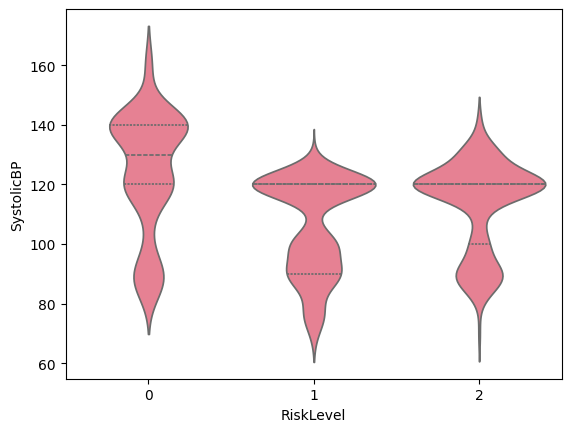

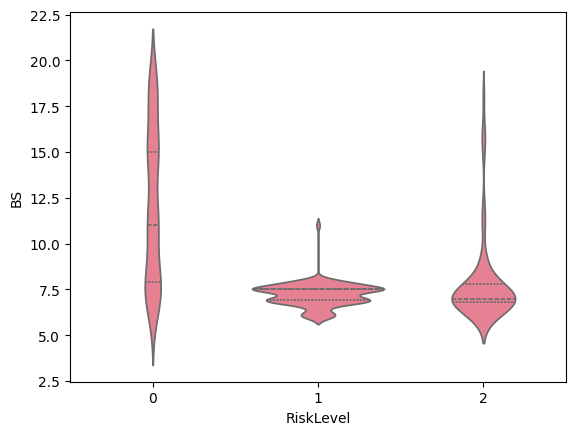

In [7]:
sns.violinplot(y='Age', x='RiskLevel', data=cirrhos, inner='quartile')
plt.show()
sns.violinplot(y='BodyTemp', x='RiskLevel', data=cirrhos, inner='quartile')
plt.show()
sns.violinplot(y='SystolicBP', x='RiskLevel', data=cirrhos, inner='quartile')
plt.show()
sns.violinplot(y='BS', x='RiskLevel', data=cirrhos, inner='quartile')
plt.show()

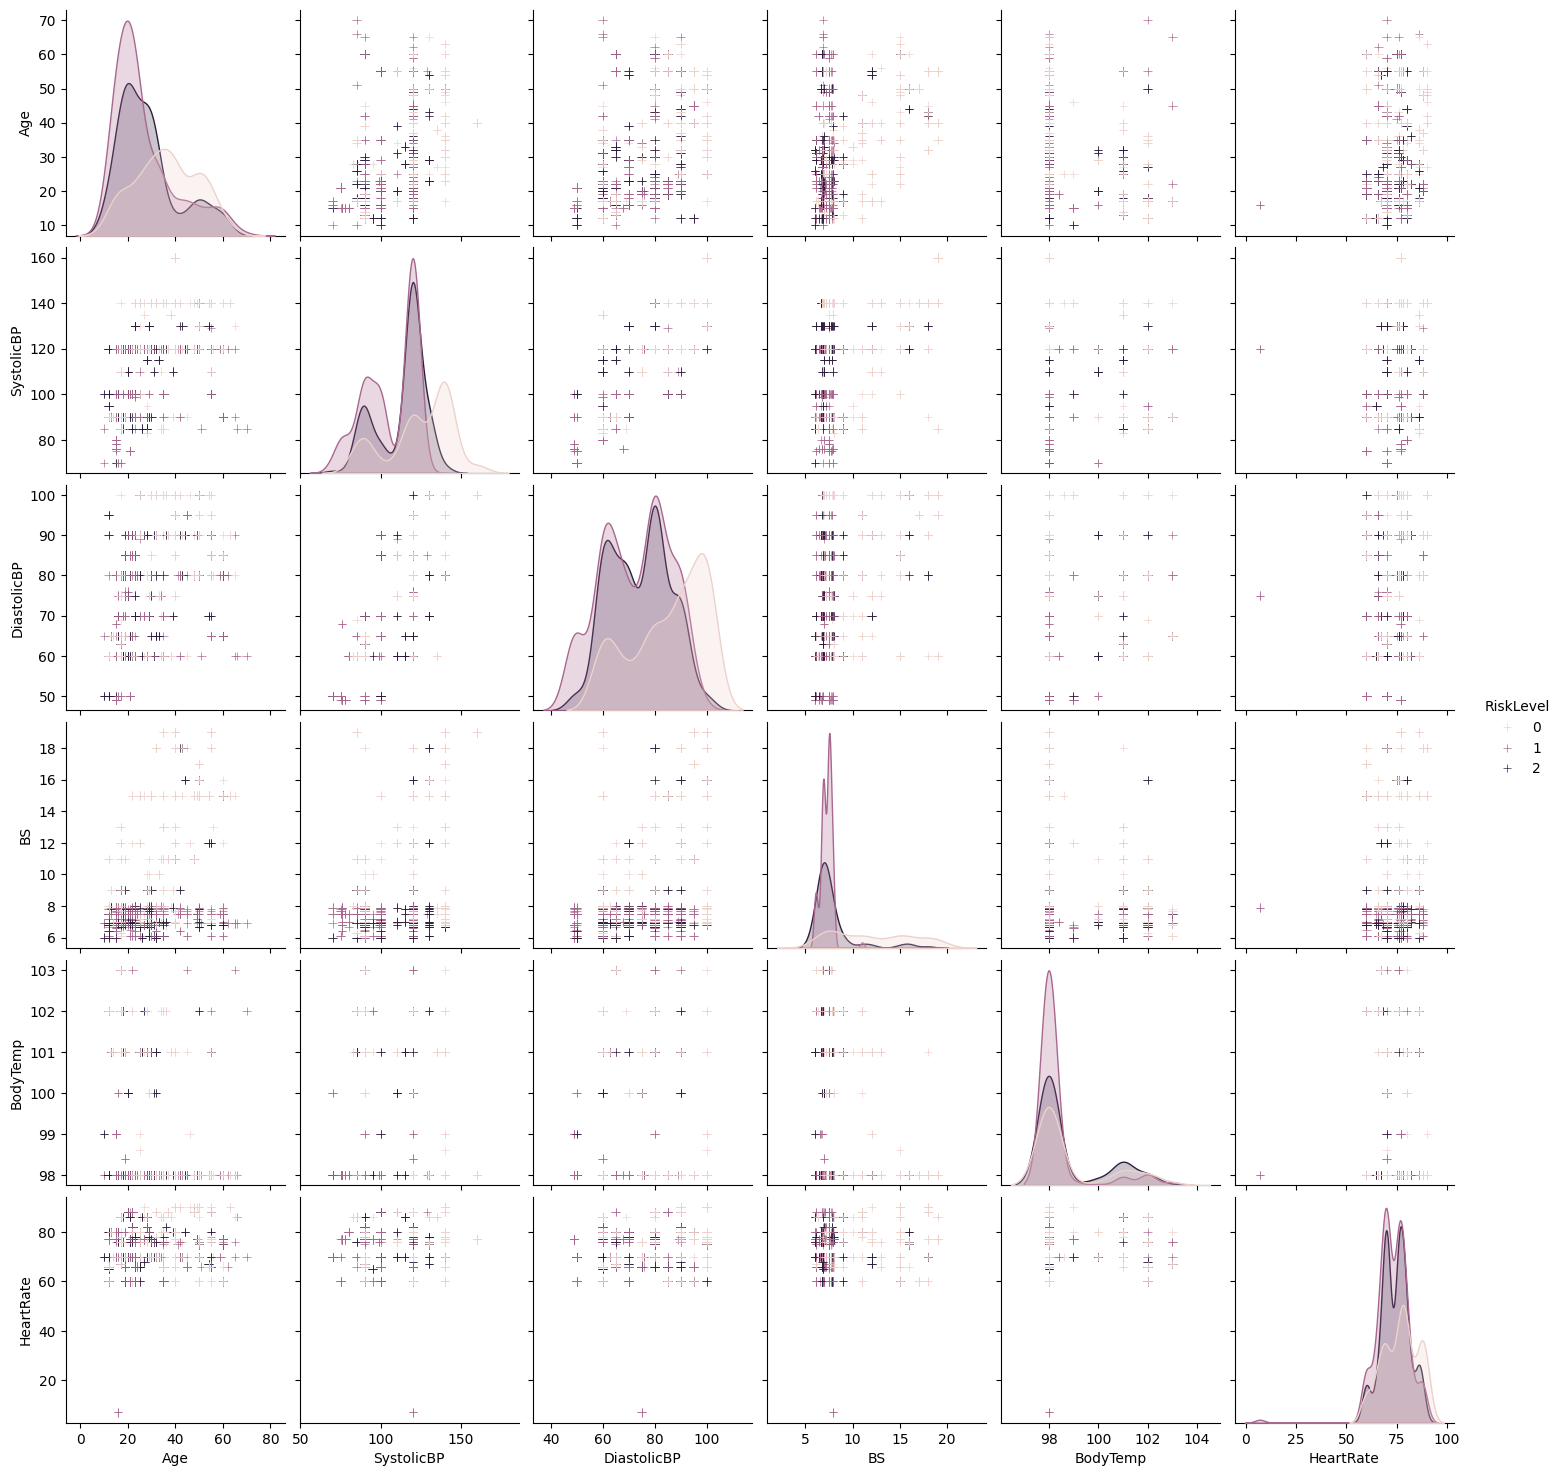

In [8]:
sns.pairplot(cirrhos, hue='RiskLevel', markers='+')
plt.show()

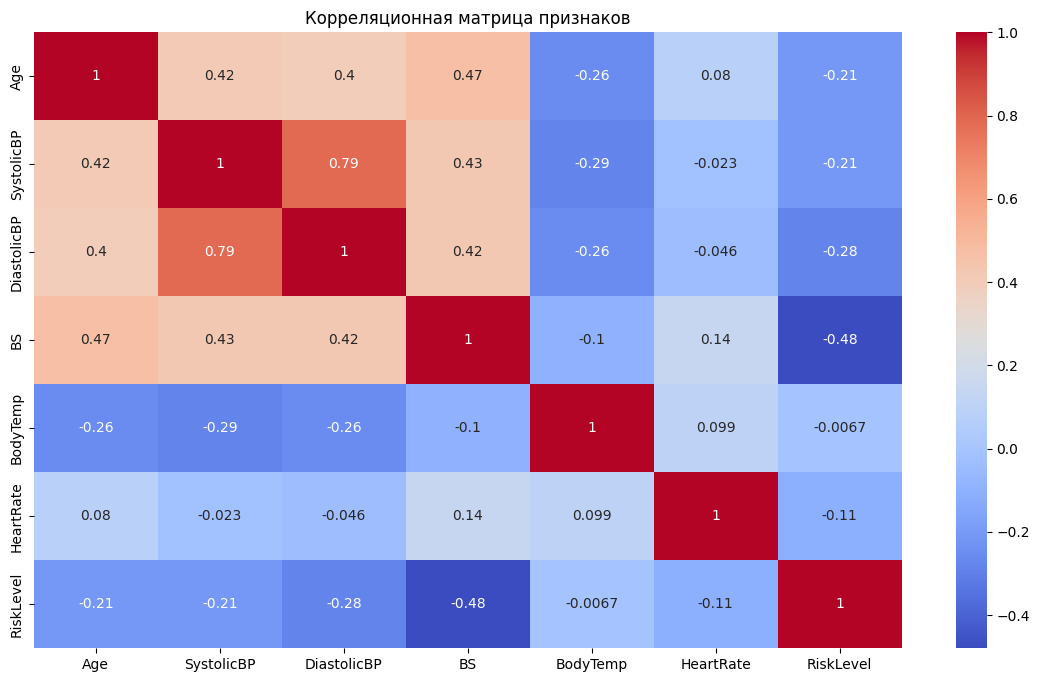

In [9]:
plt.figure(figsize=(14, 8))
correlation = cirrhos.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [10]:
X = cirrhos.drop(['RiskLevel'], axis=1)
y = cirrhos['RiskLevel']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1014, 6) | y shape: (1014,) 


In [11]:
import scipy.stats as stats

y_mapped = y

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.3, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-8.216507575668146, pvalue=6.359327465816111e-16, df=1012.0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.08255382871247946, pvalue=0.9342226402253863, df=1012.0)

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LR: 0.617766 (0.039690)
LDA: 0.627627 (0.047031)
KNN: 0.680623 (0.021216)
CART: 0.832355 (0.028961)
NB: 0.595604 (0.038838)
SVC: 0.754697 (0.038227)


In [14]:
#дерево решений

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вывод отчета о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Матрица неточностей (confusion matrix)

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


Accuracy: 0.8374384236453202

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        55
           1       0.86      0.86      0.86        81
           2       0.78      0.75      0.76        67

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



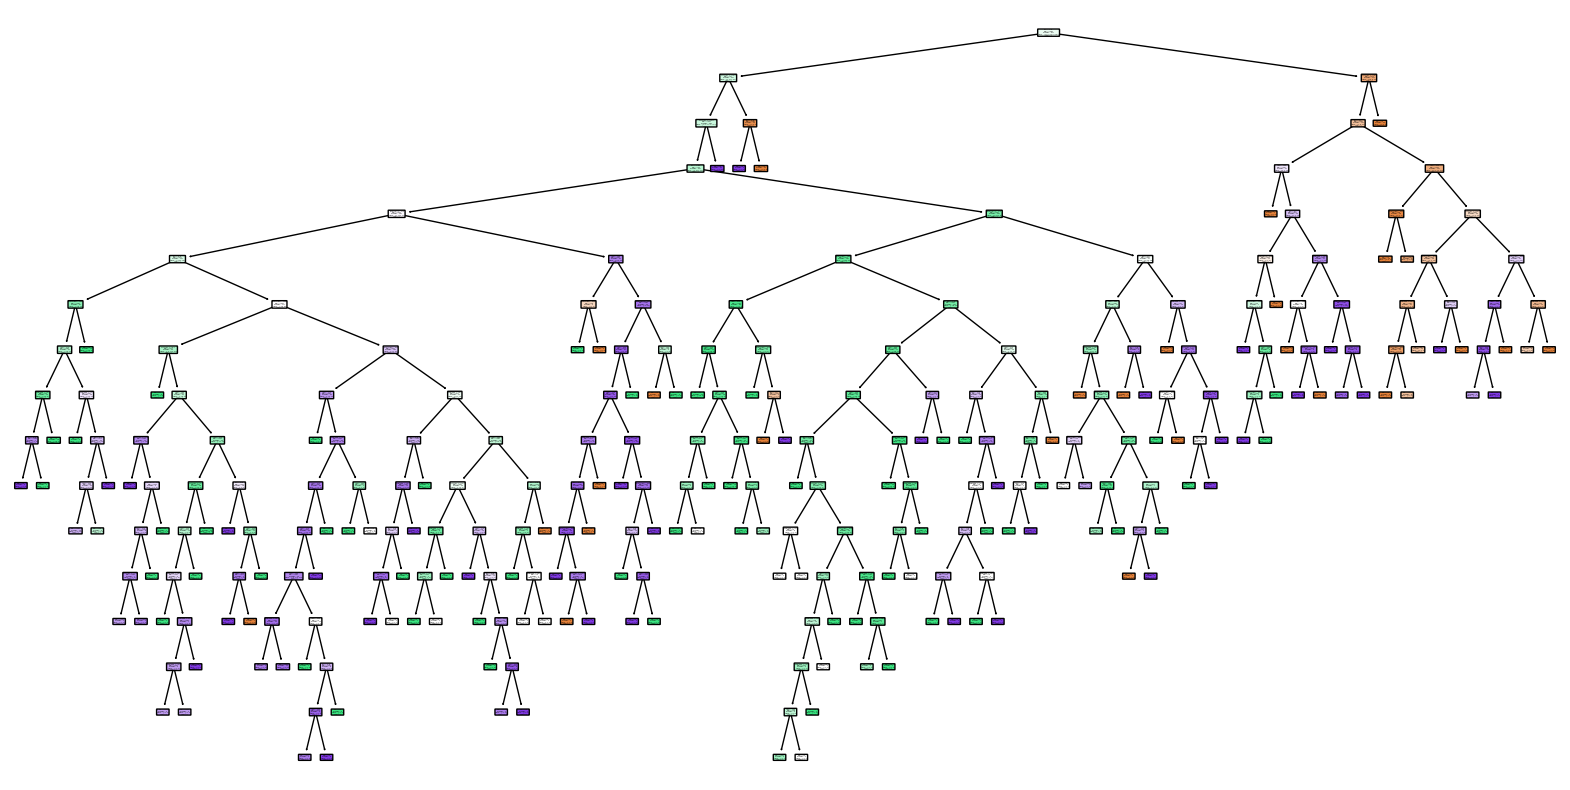

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in set(y)], rounded=True)
plt.show()